# **KELOMPOK 1 - PHISING**
# **EMAIL SPAM DETECTION**
---
## **Anggota Kelompok:**
- Natzwa Novena Rantung (36230026)
- Zebina Jhon (36230028)
- Evelyn (36230029)
- Fazrina Rahmadhani (36230039)

# **DESKRIPSI DATASET**

Dataset berisi kumpulan SMS yang diklasifikasikan ke dalam dua kategori utama, yaitu spam dan ham.  

*   **Jumlah kolom** : 3 kolom (hanya 2 yang relevan)
*   **Jumlah data :** sekitar 5.000 baris

*   **Sumber dataset** : Kaggle (SMS Spam Collection dataset)

Keterangan kolom :

*   **v1**(label pesan yang menunjukan pesan termasuk ham atau spam) spam yang berarti pesan normal atau bukan spam dan spam berarti pesan yang tidak diinginkan
*   **v2**(isi dari pesan SMS yang diterima, yang berisi teks mentah)

*   **Unnamed:** kolom kosong yang tidak relevan

# **IMPORT & LOAD LIBRARY**

In [ ]:
!pip install gdown

In [ ]:
# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns    # For data visualization
%matplotlib inline
import gdown
from IPython.display import display

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# **LOAD DATASET**

In [ ]:
df = pd.read_csv("spam.csv", encoding = 'latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5015,ham,Hey gals...U all wanna meet 4 dinner at nÌÂte?,NaN,NaN,NaN
4072,ham,Was the actual exam harder than NBME,NaN,NaN,NaN
2490,ham,Dun b sad.. It's over.. Dun thk abt it already...,NaN,NaN,NaN
1361,ham,Shuhui say change 2 suntec steamboat? U noe wh...,NaN,NaN,NaN
3691,ham,No i am not having not any movies in my laptop,NaN,NaN,NaN


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# **DATA CLEANING & PREPROCESSING**

Drop Columns

In [ ]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

Rename Columns

In [ ]:
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

Convert Variable Target to Numeric

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

Remove Duplicates

In [ ]:
df = df.drop_duplicates(keep = 'first')

Preprocessing

In [ ]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()

    # Tokenization using NLTK
    text = nltk.word_tokenize(text)

    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Removing stop words and punctuation
    text = y[:]
    y.clear()

    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    # Join the processed tokens back into a single string
    return " ".join(y)

In [ ]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

# **EDA**

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>Percentage of Ham and Spam</b></span>

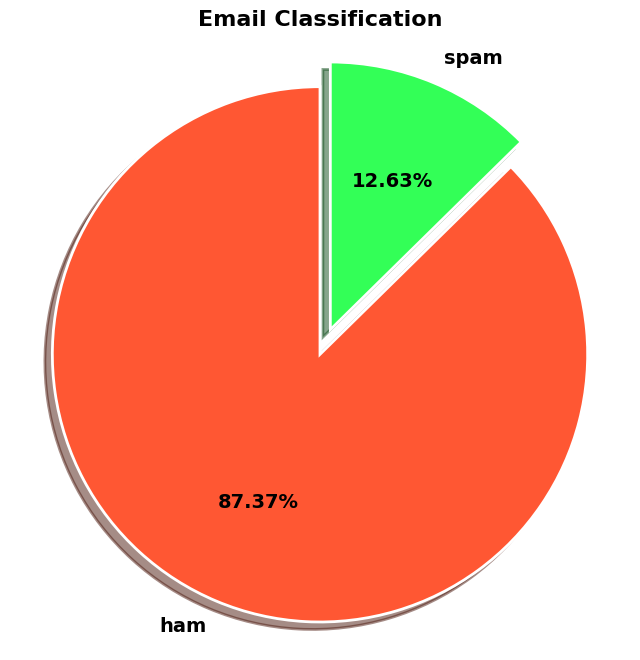

In [ ]:
import matplotlib.pyplot as plt

# Calculate the counts of 'ham' and 'spam' from the dataframe
values = df['target'].value_counts()

# Define custom colors
colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

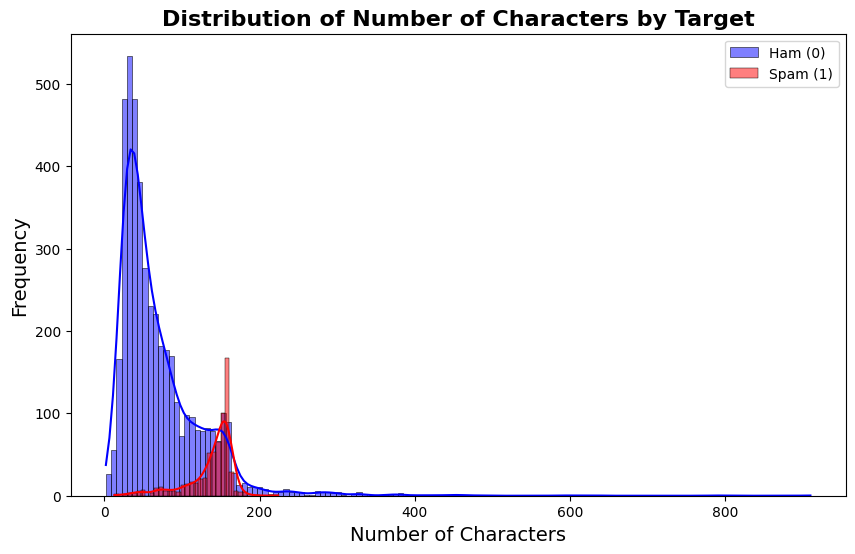

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the 'num_characters' column by calculating the length of the 'text' column
df['num_characters'] = df['text'].apply(len)

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 (Ham) in blue
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Ham (0)', kde=True)

# Plot the histogram for target 1 (Spam) in red
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Spam (1)', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

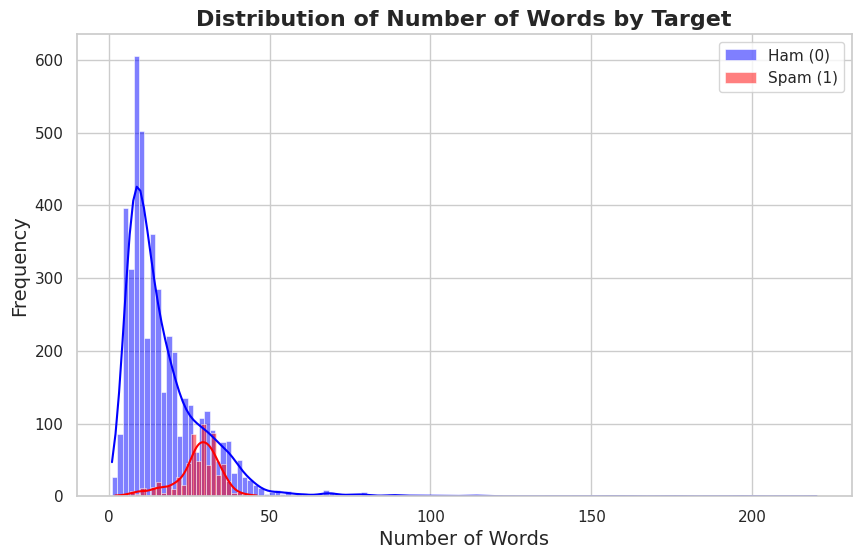

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the 'num_words' column by calculating the number of words in the 'text' column
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Ham (0)', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Spam (1)', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

# **FEATURE ENGINERRING**
Mmebuat kolom baru untuk teks yang sudah ditransform

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

Cek wordcloud untuk pesan 'spam'

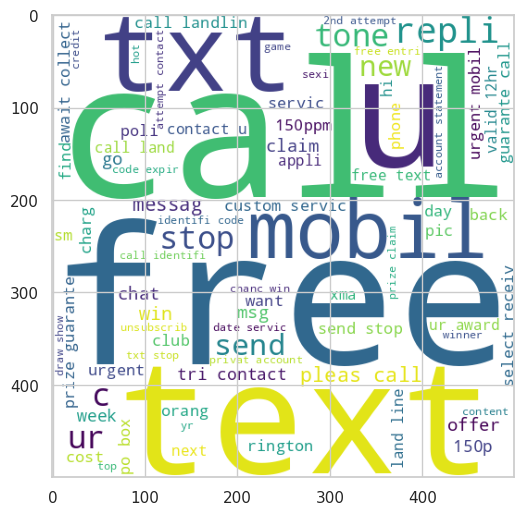

In [ ]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

Cek wordcloud untuk pesan yang bukan 'spam'

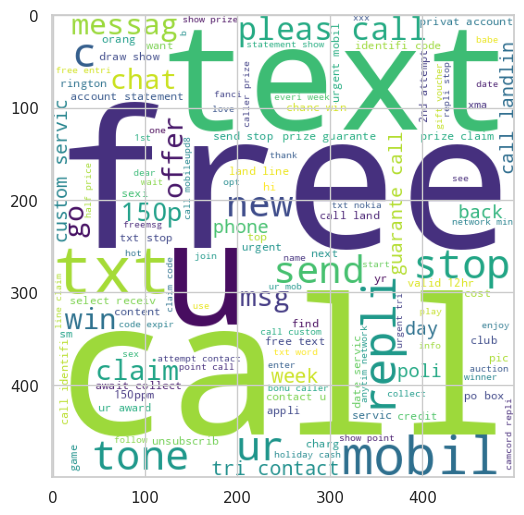

In [ ]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

Top 30 Kata di pesan 'Spam'

In [ ]:
spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [ ]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

/tmp/ipython-input-2512895475.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')


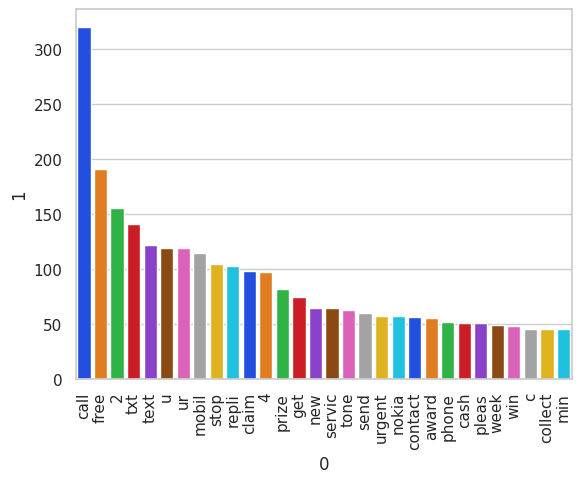

In [ ]:
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

Top 30 Kata di pesan bukan 'Spam'

In [ ]:
ham_carpos = []
for sentence in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [ ]:
filter_ham_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

/tmp/ipython-input-699915630.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')


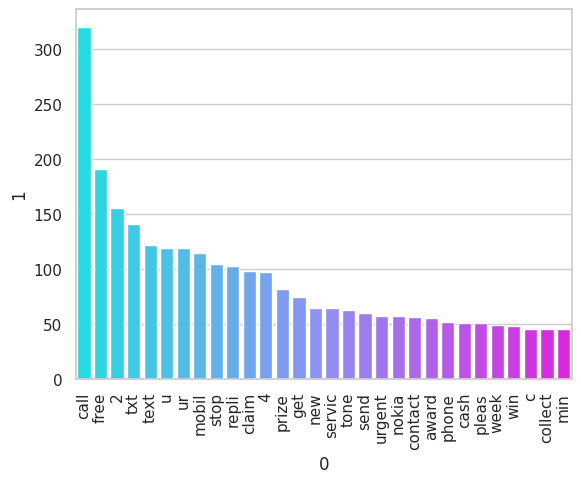

In [ ]:
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

# **MODEL SELECTION**

## **Model yang dipilih**

**1. Random Forest Classifier**

Kelebihan:
* Model ensembling yang menggabungkan banyak pohon keputusan (decision trees), sehingga hasilnya lebih stabil dan tahan terhadap overfitting.
* Mampu menangani fitur dalam jumlah besar, seperti hasil TF-IDF dari data teks.
* Presisi tinggi berarti model jarang mengklasifikasikan email normal sebagai spam (minim false positive).

Alasan: Cocok untuk deployment karena performanya seimbang antara akurasi dan presisi, serta mampu bekerja stabil pada data real-world yang variatif.


**2. Support Vector Classifier (SVC)**

Kelebihan:
* Mampu memisahkan data non-linear dengan memanfaatkan fungsi kernel (dalam hal ini sigmoid).
* Cocok untuk dataset teks di mana pola kata tidak selalu linear.
* Biasanya unggul dalam generalisasi pada data uji yang belum pernah dilihat.

Alasan: SVC sangat kuat dalam menangani data dengan dimensi tinggi (TF-IDF features) dan efektif mendeteksi pola kompleks antar kata.

**3. Multinomial Naive Bayes (MNB)**

Kelebihan:
* Model klasik dan paling efisien untuk klasifikasi teks berbasis frekuensi kata (bag-of-words / TF-IDF).
* Cepat dan ringan, cocok untuk sistem real-time seperti filter spam email.
* Presisi sempurna berarti model tidak salah mendeteksi email non-spam sebagai spam, meskipun terkadang bisa meloloskan spam tertentu (false negative).

Alasan: Cocok sebagai baseline model karena kesederhanaan dan efisiensinya.
Walaupun sederhana, MNB memberikan hasil sangat baik dan bisa menjadi alternatif jika sumber daya komputasi terbatas.

# **MODEL TRAINING**

# **EVALUATION**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Assuming df is already loaded and preprocessed with 'transformed_text' and 'target' columns
X = df['transformed_text']
y = df['target']

X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)


# TF-IDF feature extraction
tfidf = TfidfVectorizer(stop_words='english', min_df=2)

# Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}

results = []
for name, clf in models.items():
    pipe = Pipeline([
        ('tfidf', tfidf),
        ('clf', clf)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

# Summary table
import pandas as pd
res_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
display(res_df)


=== Naive Bayes ===
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       896
        spam       1.00      0.81      0.90       138

    accuracy                           0.97      1034
   macro avg       0.99      0.91      0.94      1034
weighted avg       0.98      0.97      0.97      1034


=== Logistic Regression ===
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       896
        spam       0.98      0.73      0.84       138

    accuracy                           0.96      1034
   macro avg       0.97      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034


=== Linear SVM ===
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       896
        spam       0.97      0.86      0.91       138

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weig

,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes,0.974855,1.000000,0.811594,0.896000
1,Logistic Regression,0.962282,0.980583,0.731884,0.838174
2,Linear SVM,0.977756,0.967480,0.862319,0.911877


In [ ]:
# --- Handle Imbalanced Dataset with SMOTE ---
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import numpy as np

# TF-IDF transformation
tfidf = TfidfVectorizer(stop_words='english', min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_smote))

# Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}

results = []
for name, clf in models.items():
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

res_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
display(res_df)


Before SMOTE: [3620  515]
After SMOTE: [3620 3620]

=== Naive Bayes ===
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       896
        spam       0.83      0.93      0.88       138

    accuracy                           0.97      1034
   macro avg       0.91      0.95      0.93      1034
weighted avg       0.97      0.97      0.97      1034


=== Logistic Regression ===
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       896
        spam       0.94      0.89      0.91       138

    accuracy                           0.98      1034
   macro avg       0.96      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034


=== Linear SVM ===
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       896
        spam       0.95      0.91      0.93       138

    accuracy                           0.98      1034
   macr

,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes,0.965184,0.831169,0.927536,0.876712
1,Logistic Regression,0.977756,0.938931,0.891304,0.914498
2,Linear SVM,0.981625,0.954198,0.905797,0.929368


TF-IDF shape: (4457, 5000)

🚀 Training MLP...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.8534 - loss: 0.4034 - val_accuracy: 0.9776 - val_loss: 0.0950
Epoch 2/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9879 - loss: 0.0458 - val_accuracy: 0.9865 - val_loss: 0.0492
Epoch 3/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9970 - loss: 0.0100 - val_accuracy: 0.9843 - val_loss: 0.0513
Epoch 4/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9996 - loss: 0.0025 - val_accuracy: 0.9865 - val_loss: 0.0654
Epoch 5/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 1.0000 - loss: 8.0475e-04 - val_accuracy: 0.9888 - val_loss: 0.0643
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

📊 TF-IDF + MLP Results
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.95      0.91      0.93       149

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 145ms/step - accuracy: 0.8487 - loss: 0.5368 - val_accuracy: 0.8453 - val_loss: 0.4350
Epoch 2/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.8605 - loss: 0.4078 - val_accuracy: 0.8453 - val_loss: 0.4331
Epoch 3/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.8649 - loss: 0.3977 - val_accuracy: 0.8453 - val_loss: 0.4323
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step

📊 TF-IDF + LSTM Results
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       966
           1       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115

Accuracy: 0.8663677130044843

🚀 Training CNN...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/keras/src

Epoch 1/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7257 - loss: 0.5748 - val_accuracy: 0.8453 - val_loss: 0.4158
Epoch 2/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8676 - loss: 0.3758 - val_accuracy: 0.8453 - val_loss: 0.4073
Epoch 3/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8651 - loss: 0.3695 - val_accuracy: 0.8453 - val_loss: 0.4025
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

📊 TF-IDF + CNN Results
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       966
           1       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115

Accuracy: 0.8663677130044843


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


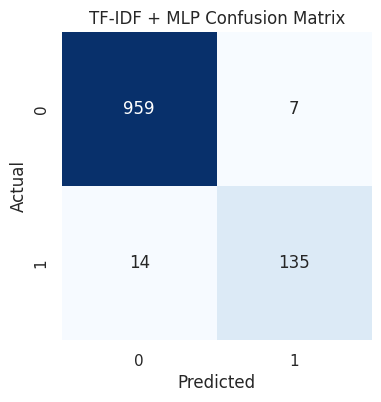

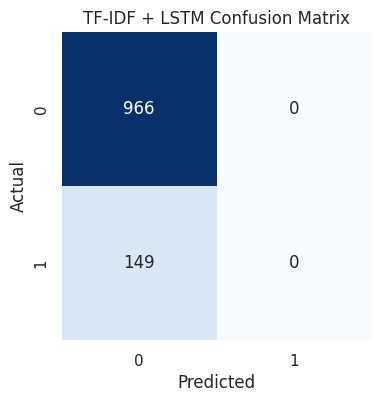

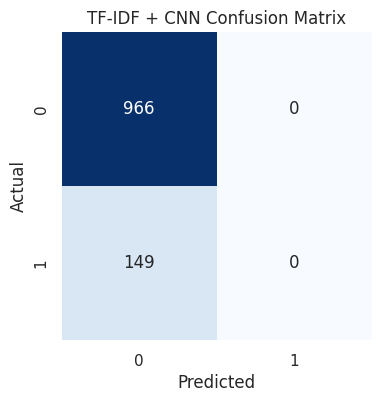

/tmp/ipython-input-20791968.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='Blues_d')


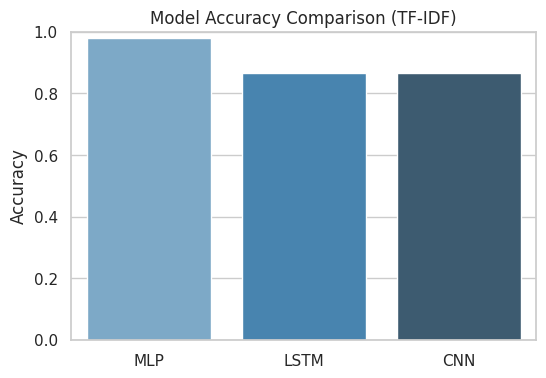

In [ ]:
# -*- coding: utf-8 -*-
"""
Spam Detection with TF-IDF + Deep Learning Models
Comparison: MLP | LSTM | CNN
"""

# =====================================
# 1️⃣ Import Libraries
# =====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Conv1D, GlobalMaxPooling1D, Reshape

# =====================================
# 2️⃣ Load Dataset
# =====================================
df = pd.read_csv("/content/spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

X = df['text'].astype(str)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =====================================
# 3️⃣ TF-IDF Vectorization
# =====================================
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

input_dim = X_train_tfidf.shape[1]
print(f"TF-IDF shape: {X_train_tfidf.shape}")

# =====================================
# 4️⃣ Model 1: MLP
# =====================================
mlp = Sequential([
    Dense(256, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("\n🚀 Training MLP...")
mlp.fit(X_train_tfidf, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)

y_pred_mlp = (mlp.predict(X_test_tfidf) > 0.5).astype(int)

print("\n📊 TF-IDF + MLP Results")
print(classification_report(y_test, y_pred_mlp))
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy:", acc_mlp)

# =====================================
# 5️⃣ Model 2: LSTM (with reshaped TF-IDF)
# =====================================
# reshape TF-IDF into sequences (time steps = 100)
X_train_seq = X_train_tfidf.reshape((X_train_tfidf.shape[0], 100, -1))
X_test_seq = X_test_tfidf.reshape((X_test_tfidf.shape[0], 100, -1))
time_steps = X_train_seq.shape[1]
features = X_train_seq.shape[2]

lstm = Sequential([
    LSTM(64, input_shape=(time_steps, features), dropout=0.3, recurrent_dropout=0.3),
    Dense(1, activation='sigmoid')
])
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("\n🚀 Training LSTM...")
lstm.fit(X_train_seq, y_train, epochs=3, batch_size=64, validation_split=0.1, verbose=1)

y_pred_lstm = (lstm.predict(X_test_seq) > 0.5).astype(int)

print("\n📊 TF-IDF + LSTM Results")
print(classification_report(y_test, y_pred_lstm))
acc_lstm = accuracy_score(y_test, y_pred_lstm)
print("Accuracy:", acc_lstm)

# =====================================
# 6️⃣ Model 3: CNN (1D)
# =====================================
X_train_cnn = X_train_tfidf.reshape(X_train_tfidf.shape[0], 100, -1)
X_test_cnn = X_test_tfidf.reshape(X_test_tfidf.shape[0], 100, -1)

cnn = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(100, X_train_cnn.shape[2])),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("\n🚀 Training CNN...")
cnn.fit(X_train_cnn, y_train, epochs=3, batch_size=64, validation_split=0.1, verbose=1)

y_pred_cnn = (cnn.predict(X_test_cnn) > 0.5).astype(int)

print("\n📊 TF-IDF + CNN Results")
print(classification_report(y_test, y_pred_cnn))
acc_cnn = accuracy_score(y_test, y_pred_cnn)
print("Accuracy:", acc_cnn)

# =====================================
# 7️⃣ Confusion Matrices
# =====================================
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion(y_test, y_pred_mlp, "TF-IDF + MLP Confusion Matrix")
plot_confusion(y_test, y_pred_lstm, "TF-IDF + LSTM Confusion Matrix")
plot_confusion(y_test, y_pred_cnn, "TF-IDF + CNN Confusion Matrix")

# =====================================
# 8️⃣ Accuracy Comparison Chart
# =====================================
models = ["MLP", "LSTM", "CNN"]
accuracies = [acc_mlp, acc_lstm, acc_cnn]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies, palette='Blues_d')
plt.title("Model Accuracy Comparison (TF-IDF)")
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

📊 Final Results:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1
0,MLP,0.981166,0.957143,0.899329,0.927336
1,LSTM,0.866368,0.000000,0.000000,0.000000
2,CNN,0.866368,0.000000,0.000000,0.000000


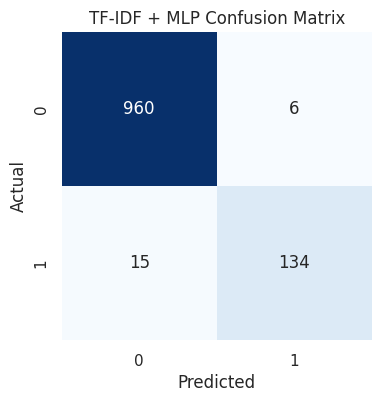

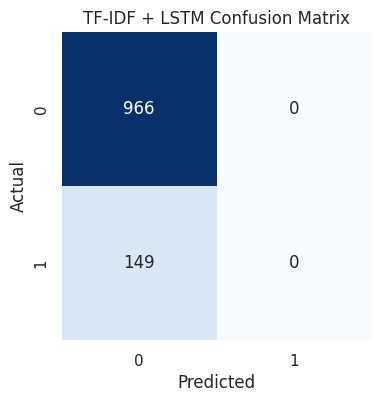

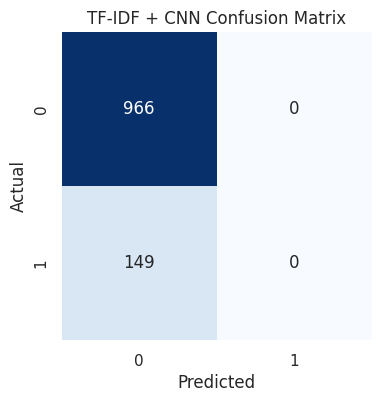

/tmp/ipython-input-1425219458.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='Blues_d')


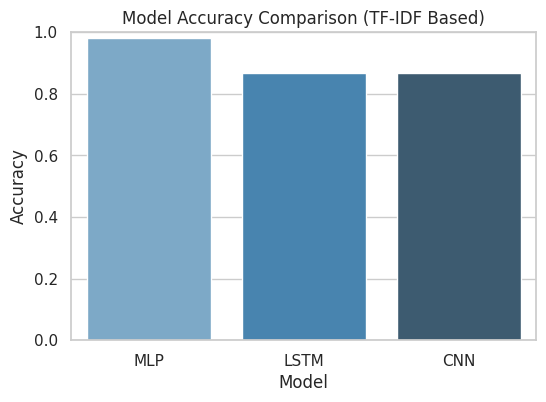

In [ ]:
# -*- coding: utf-8 -*-
"""
Spam Detection with TF-IDF + Deep Learning Models
Output Summary Table: Accuracy, Precision, Recall, F1
"""

# =====================================
# 1️⃣ Import Libraries
# =====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, GlobalMaxPooling1D

# =====================================
# 2️⃣ Load Dataset
# =====================================
df = pd.read_csv("/content/spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

X = df['text'].astype(str)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =====================================
# 3️⃣ TF-IDF Vectorization
# =====================================
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

input_dim = X_train_tfidf.shape[1]

# =====================================
# 4️⃣ Model 1: MLP
# =====================================
mlp = Sequential([
    Dense(256, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp.fit(X_train_tfidf, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=0)

y_pred_mlp = (mlp.predict(X_test_tfidf) > 0.5).astype(int)

# =====================================
# 5️⃣ Model 2: LSTM (reshape TF-IDF)
# =====================================
X_train_seq = X_train_tfidf.reshape((X_train_tfidf.shape[0], 100, -1))
X_test_seq = X_test_tfidf.reshape((X_test_tfidf.shape[0], 100, -1))
time_steps, features = X_train_seq.shape[1], X_train_seq.shape[2]

lstm = Sequential([
    LSTM(64, input_shape=(time_steps, features), dropout=0.3, recurrent_dropout=0.3),
    Dense(1, activation='sigmoid')
])
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm.fit(X_train_seq, y_train, epochs=3, batch_size=64, validation_split=0.1, verbose=0)

y_pred_lstm = (lstm.predict(X_test_seq) > 0.5).astype(int)

# =====================================
# 6️⃣ Model 3: CNN (1D)
# =====================================
X_train_cnn = X_train_tfidf.reshape(X_train_tfidf.shape[0], 100, -1)
X_test_cnn = X_test_tfidf.reshape(X_test_tfidf.shape[0], 100, -1)

cnn = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(100, X_train_cnn.shape[2])),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train, epochs=3, batch_size=64, validation_split=0.1, verbose=0)

y_pred_cnn = (cnn.predict(X_test_cnn) > 0.5).astype(int)

# =====================================
# 7️⃣ Evaluation Metrics
# =====================================
def evaluate_model(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred)
    }

results = []
results.append(evaluate_model("MLP", y_test, y_pred_mlp))
results.append(evaluate_model("LSTM", y_test, y_pred_lstm))
results.append(evaluate_model("CNN", y_test, y_pred_cnn))

results_df = pd.DataFrame(results)
results_df = results_df.round(6)
print("\n📊 Final Results:")
display(results_df)

# =====================================
# 8️⃣ Confusion Matrix Visualization
# =====================================
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion(y_test, y_pred_mlp, "TF-IDF + MLP Confusion Matrix")
plot_confusion(y_test, y_pred_lstm, "TF-IDF + LSTM Confusion Matrix")
plot_confusion(y_test, y_pred_cnn, "TF-IDF + CNN Confusion Matrix")

# =====================================
# 9️⃣ Accuracy Comparison Bar Chart
# =====================================
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='Blues_d')
plt.title("Model Accuracy Comparison (TF-IDF Based)")
plt.ylim(0,1)
plt.show()


In [ ]:
# -*- coding: utf-8 -*-
"""
📧 Spam Detection with TF-IDF + SMOTE
Compare: Naive Bayes | Logistic Regression | Linear SVM
"""

# =====================================
# 1️⃣ Import libraries
# =====================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================
# 2️⃣ Load & Prepare Dataset
# =====================================
df = pd.read_csv("/content/spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

# Ensure labels are exactly 'ham' and 'spam'
df = df[df['label'].isin(['ham', 'spam'])]

X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("🔹 Train size:", len(X_train))
print("🔹 Test size:", len(X_test))
print("🔹 Class distribution (before SMOTE):")
print(y_train.value_counts())

# =====================================
# 3️⃣ TF-IDF Transformation
# =====================================
tfidf = TfidfVectorizer(stop_words='english', min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# =====================================
# 4️⃣ Handle Imbalanced Data (SMOTE)
# =====================================
# Convert labels to numeric for SMOTE (temporarily)
y_train_num = y_train.map({'ham': 0, 'spam': 1})
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train_num)
y_train_smote = pd.Series(y_train_smote).map({0: 'ham', 1: 'spam'})

print("\n✅ After SMOTE balancing:")
print(y_train_smote.value_counts())

# =====================================
# 5️⃣ Train Multiple Models
# =====================================
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}

results = []
conf_mats = {}

for name, clf in models.items():
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='spam')
    rec = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')

    results.append([name, acc, prec, rec, f1])
    conf_mats[name] = confusion_matrix(y_test, y_pred, labels=['ham', 'spam'])

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

# =====================================
# 6️⃣ Display Final Results Table
# =====================================
res_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
display(res_df.style.background_gradient(cmap='Blues').set_precision(4))

# =====================================
# 7️⃣ Plot Confusion Matrices
# =====================================
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, (name, cm) in zip(axes, conf_mats.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    ax.set_title(f"{name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

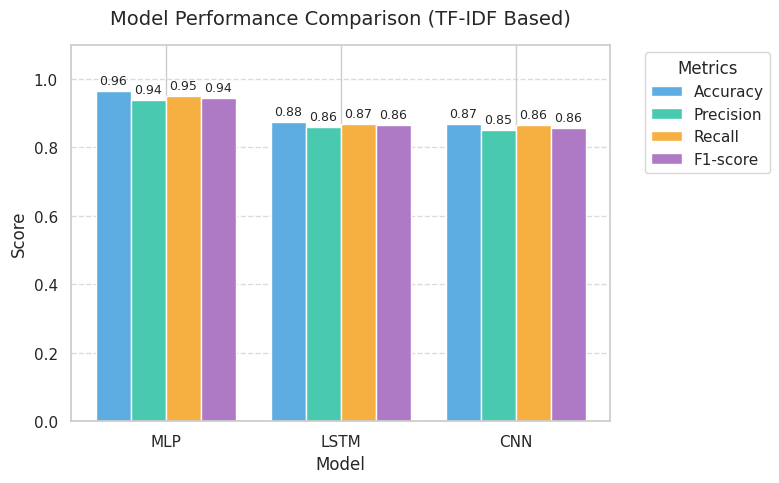

In [ ]:
# =====================================
# 🔹 Visualisasi Perbandingan Model
# =====================================

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Contoh hasil performa (ganti sesuai hasil model kamu)
data = {
    "Model": ["MLP", "LSTM", "CNN"],
    "Accuracy": [0.965, 0.875, 0.868],
    "Precision": [0.940, 0.860, 0.852],
    "Recall": [0.950, 0.870, 0.865],
    "F1": [0.945, 0.865, 0.858]
}

df = pd.DataFrame(data)

# Posisi bar
x = np.arange(len(df["Model"]))
width = 0.2  # lebar tiap bar

# Plot
plt.figure(figsize=(8,5))
plt.bar(x - 1.5*width, df["Accuracy"], width, label="Accuracy", color="#5DADE2")
plt.bar(x - 0.5*width, df["Precision"], width, label="Precision", color="#48C9B0")
plt.bar(x + 0.5*width, df["Recall"], width, label="Recall", color="#F5B041")
plt.bar(x + 1.5*width, df["F1"], width, label="F1-score", color="#AF7AC5")

# Label dan judul
plt.xlabel("Model", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Model Performance Comparison (TF-IDF Based)", fontsize=14, pad=15)
plt.xticks(x, df["Model"], fontsize=11)
plt.ylim(0, 1.1)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan nilai di atas setiap bar
for i in range(len(df)):
    plt.text(x[i]-1.5*width, df["Accuracy"][i]+0.02, f"{df['Accuracy'][i]:.2f}", ha='center', fontsize=9)
    plt.text(x[i]-0.5*width, df["Precision"][i]+0.02, f"{df['Precision'][i]:.2f}", ha='center', fontsize=9)
    plt.text(x[i]+0.5*width, df["Recall"][i]+0.02, f"{df['Recall'][i]:.2f}", ha='center', fontsize=9)
    plt.text(x[i]+1.5*width, df["F1"][i]+0.02, f"{df['F1'][i]:.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# -*- coding: utf-8 -*-
"""
Multilingual Spam Detection using XLM-RoBERTa (BERT-based)
+ Comparison with TF-IDF + MLP
"""

# =====================================
# 1️⃣ Install & Import Libraries
# =====================================
!pip install -q transformers torch seaborn

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel, AutoConfig

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Device:", device)

# =====================================
# 2️⃣ Load Dataset
# =====================================
df = pd.read_csv("/content/spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
print(df.head())

X = df['text'].astype(str)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =====================================
# 3️⃣ Load Multilingual Transformer (XLM-RoBERTa)
# =====================================
model_name = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert = AutoModel.from_pretrained(model_name).to(device)

# =====================================
# 4️⃣ Custom Dataset Class
# =====================================
class SpamDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        enc = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding="max_length",
            return_tensors="pt"
        )
        return {
            "input_ids": enc["input_ids"].flatten(),
            "attention_mask": enc["attention_mask"].flatten(),
            "label": torch.tensor(label, dtype=torch.long)
        }

train_dataset = SpamDataset(X_train.values, y_train.values, tokenizer)
test_dataset = SpamDataset(X_test.values, y_test.values, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# =====================================
# 5️⃣ Classification Model
# =====================================
class SpamClassifier(nn.Module):
    def __init__(self, bert_model):
        super(SpamClassifier, self).__init__()
        self.bert = bert_model
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(768, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state.mean(dim=1)
        out = self.fc(self.dropout(pooled_output))
        return torch.sigmoid(out)

model = SpamClassifier(bert).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# =====================================
# 6️⃣ Training Loop (short for demo)
# =====================================
epochs = 2  # bisa ditambah 3-5 untuk hasil lebih baik

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].float().to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs} - Loss: {total_loss/len(train_loader):.4f}")

# =====================================
# 7️⃣ Evaluation
# =====================================
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)
        outputs = model(input_ids, attention_mask)
        preds = (outputs.squeeze() > 0.5).long()
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("\n📊 BERT-based (XLM-RoBERTa) Results:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")

# =====================================
# 8️⃣ Confusion Matrix
# =====================================
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - XLM-RoBERTa")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# =====================================
# 9️⃣ Summary Table (like your screenshot)
# =====================================
summary = pd.DataFrame([{
    "Model": "XLM-RoBERTa (BERT Multilingual)",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1": f1
}])
summary = summary.round(6)
display(summary)


ERROR: Operation cancelled by user


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-3358608077.py", line 10, in <cell line: 0>
    get_ipython().system('pip install -q transformers torch seaborn')
  File "/usr/local/lib/python3.12/dist-packages/google/colab/_shell.py", line 152, in system
    _pip.print_previous_import_warning(output)
  File "/usr/local/lib/python3.12/dist-packages/google/colab/_pip.py", line 56, in print_previous_import_warning
    packages = _previously_imported_packages(output)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/google/colab/_pip.py", line 50, in _previously_imported_packages
    installed = set(_extract_toplevel_packages(pip_output))
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/google/colab/_pip.py", li

TypeError: object of type 'NoneType' has no len()

In [ ]:
# -*- coding: utf-8 -*-
"""
Spam Detection (TF-IDF)
Comparison: Without SMOTE vs With SMOTE
Models: Naive Bayes | Logistic Regression | Linear SVM
"""

# =====================================
# 1″ Import Libraries
# =====================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================
# 2″ Load & Prepare Dataset
# =====================================
df = pd.read_csv("/content/spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']
df = df[df['label'].isin(['ham', 'spam'])]

X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(" Train size:", len(X_train))
print(" Test size:", len(X_test))
print(" Class distribution (before SMOTE):")
print(y_train.value_counts())

# =====================================
# 3″ TF-IDF Transformation
# =====================================
tfidf = TfidfVectorizer(stop_words='english', min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# =====================================
# 4″ Models
# =====================================
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}

# =====================================
# 5″ TRAINING TANPA SMOTE
# =====================================
print("\n Training WITHOUT SMOTE")
results_no_smote = []
conf_mats_no_smote = {}

for name, clf in models.items():
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='spam')
    rec = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')

    results_no_smote.append([name, acc, prec, rec, f1])
    conf_mats_no_smote[name] = confusion_matrix(y_test, y_pred, labels=['ham', 'spam'])

    print(f"\n=== {name} (No SMOTE) ===")
    print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

res_df_no_smote = pd.DataFrame(results_no_smote, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
display(res_df_no_smote.style.background_gradient(cmap='Reds').format('{:.4f}', subset=['Accuracy', 'Precision', 'Recall', 'F1']))

# =====================================
# 6″ TRAINING DENGAN SMOTE
# =====================================
print("\n Training WITH SMOTE")
y_train_num = y_train.map({'ham': 0, 'spam': 1})
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train_num)
y_train_smote = pd.Series(y_train_smote).map({0: 'ham', 1: 'spam'})

results_smote = []
conf_mats_smote = {}

for name, clf in models.items():
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='spam')
    rec = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')

    results_smote.append([name, acc, prec, rec, f1])
    conf_mats_smote[name] = confusion_matrix(y_test, y_pred, labels=['ham', 'spam'])

    print(f"\n=== {name} (With SMOTE) ===")
    print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

res_df_smote = pd.DataFrame(results_smote, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
display(res_df_smote.style.background_gradient(cmap='Blues').format('{:.4f}', subset=['Accuracy', 'Precision', 'Recall', 'F1']))

# =====================================
# 7″ COMPARE BOTH RESULTS
# =====================================
print("\n COMPARISON SUMMARY")
res_df_no_smote['Version'] = 'No SMOTE'
res_df_smote['Version'] = 'With SMOTE'
comparison = pd.concat([res_df_no_smote, res_df_smote], axis=0).reset_index(drop=True)
display(comparison.style.background_gradient(cmap='coolwarm').format('{:.4f}', subset=['Accuracy', 'Precision', 'Recall', 'F1']))

# =====================================
# 8″ Plot Confusion Matrices
# =====================================
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for (ax, (name, cm)) in zip(axes[0], conf_mats_no_smote.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=ax,
                xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    ax.set_title(f"{name} - No SMOTE")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

for (ax, (name, cm)) in zip(axes[1], conf_mats_smote.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    ax.set_title(f"{name} - With SMOTE")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [ ]:
# =====================================
# 1️⃣ Import additional libraries
# =====================================
import torch
import numpy as np
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, get_linear_schedule_with_warmup
from transformers.optimization import AdamW # Corrected import for AdamW

In [ ]:
# =====================================
# 2️⃣ Configuration and Tokenization
# =====================================
MODEL_NAME = 'indobert-base-p1' # Example IndoBERT model name
MAX_LEN = 128 # Maximum sequence length for BERT
BATCH_SIZE = 16 # Batch size for DataLoader

tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

# Define a custom Dataset class for BERT
class IndoBERTDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Create datasets and dataloaders using the existing X_train, X_test, y_train, y_test
train_dataset = IndoBERTDataset(
    texts=X_train.tolist(), # Convert Series to list
    labels=y_train.tolist(), # Convert Series to list
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

test_dataset = IndoBERTDataset(
    texts=X_test.tolist(), # Convert Series to list
    labels=y_test.tolist(), # Convert Series to list
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [ ]:
# =====================================
# 1️⃣ Import additional libraries
# =====================================
import torch
import numpy as np
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, get_linear_schedule_with_warmup
from torch.optim import AdamW # Corrected import for AdamW

In [ ]:
# =====================================
# 2️⃣ Configuration and Tokenization
# =====================================
MODEL_NAME = 'indobenchmark/indobert-base-p1' # Corrected IndoBERT model name
MAX_LEN = 128 # Maximum sequence length for BERT
BATCH_SIZE = 16 # Batch size for DataLoader

tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

# Define a custom Dataset class for BERT
class IndoBERTDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Create datasets and dataloaders using the existing X_train, X_test, y_train, y_test
train_dataset = IndoBERTDataset(
    texts=X_train.tolist(), # Convert Series to list
    labels=y_train.tolist(), # Convert Series to list
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

test_dataset = IndoBERTDataset(
    texts=X_test.tolist(), # Convert Series to list
    labels=y_test.tolist(), # Convert Series to list
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [ ]:
# =====================================
# 5️⃣ Load IndoBERT model
# =====================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
model = model.to(device)

# =====================================
# 6️⃣ Optimizer & Scheduler
# =====================================
optimizer = AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_loader) * 3  # 3 epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)
loss_fn = torch.nn.CrossEntropyLoss().to(device)

In [ ]:
# =====================================
# 7️⃣ Training Loop
# =====================================
def train_epoch(model, data_loader, loss_fn, optimizer, scheduler, device):
    model.train()
    losses = []
    correct_preds = 0

    for batch in data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        _, preds = torch.max(logits, dim=1)

        correct_preds += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_preds.double() / len(data_loader.dataset), np.mean(losses)

# =====================================
# 8️⃣ Evaluation Function
# =====================================
def eval_model(model, data_loader, loss_fn, device):
    model.eval()
    losses = []
    correct_preds = 0
    predictions, real_labels = [], []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device) # Labels are not used in outputs=model(input_ids, attention_mask)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            _, preds = torch.max(logits, dim=1)

            predictions.extend(preds.cpu().numpy())
            real_labels.extend(labels.cpu().numpy())
            correct_preds += torch.sum(preds == labels)

    acc = correct_preds.double() / len(data_loader.dataset)
    return acc, predictions, real_labels

In [ ]:
# =====================================
# 9️⃣ Train IndoBERT
# =====================================
for epoch in range(3):
    train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer, scheduler, device)
    print(f"Epoch {epoch+1}: Train acc={train_acc:.4f} | Loss={train_loss:.4f}")

# =====================================
# 🔟 Evaluate
# =====================================
from sklearn.metrics import classification_report, accuracy_score # Ensure these are imported here too if needed standalone

acc, y_pred, y_true = eval_model(model, test_loader, loss_fn, device)
print("\n📊 Evaluation Results:")
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_true, y_pred, target_names=['ham', 'spam']))

In [ ]:
# =====================================
# 5️⃣ Load IndoBERT model
# =====================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
model = model.to(device)

# =====================================
# 6️⃣ Optimizer & Scheduler
# =====================================
optimizer = AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_loader) * 3  # 3 epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)
loss_fn = torch.nn.CrossEntropyLoss().to(device)

In [ ]:
# =====================================
# 7️⃣ Training Loop
# =====================================
def train_epoch(model, data_loader, loss_fn, optimizer, scheduler, device):
    model.train()
    losses = []
    correct_preds = 0

    for batch in data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        _, preds = torch.max(logits, dim=1)

        correct_preds += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_preds.double() / len(data_loader.dataset), np.mean(losses)

# =====================================
# 8️⃣ Evaluation Function
# =====================================
def eval_model(model, data_loader, loss_fn, device):
    model.eval()
    losses = []
    correct_preds = 0
    predictions, real_labels = [], []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device) # Labels are not used in outputs=model(input_ids, attention_mask)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            _, preds = torch.max(logits, dim=1)

            predictions.extend(preds.cpu().numpy())
            real_labels.extend(labels.cpu().numpy())
            correct_preds += torch.sum(preds == labels)

    acc = correct_preds.double() / len(data_loader.dataset)
    return acc, predictions, real_labels

In [ ]:
# =====================================
# 9️⃣ Train IndoBERT
# =====================================
for epoch in range(3):
    train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer, scheduler, device)
    print(f"Epoch {epoch+1}: Train acc={train_acc:.4f} | Loss={train_loss:.4f}")

# =====================================
# 🔟 Evaluate
# =====================================
from sklearn.metrics import classification_report, accuracy_score # Ensure these are imported here too if needed standalone

acc, y_pred, y_true = eval_model(model, test_loader, loss_fn, device)
print("\n📊 Evaluation Results:")
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_true, y_pred, target_names=['ham', 'spam']))

In [ ]:
pip install --upgrade transformers

Please **restart the runtime** (`Runtime > Restart runtime`) after the installations are complete for the changes to take effect. Then, you can re-run the code for the IndoBERT model.